In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from IPython.display import HTML
import io
import base64
class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 2px;
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))

In [2]:
factors = ['cl3d_c1', 'cl3d_c2', 'cl3d_c3']
pTs = ['cl3d_pt', 'cl3d_pt_c1', 'cl3d_pt_c2', 'cl3d_pt_c3']

In [3]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/calibrated_C1skimC2C3'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_calibrated.hdf5',
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_calibrated.hdf5',
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfVal = store_tr[name]
store_tr.close()

df = pd.concat([dfTr, dfVal], sort=False)
del dfTr, dfVal

In [4]:
dfQCD = df.query('gentau_decayMode==-2 and cl3d_isbestmatch==True').copy(deep=True)
dfTau = df.query('sgnId==1').copy(deep=True)
dfNu  = df.query('geom_match==False').copy(deep=True)

In [5]:
dfDM0 = df.query('gentau_decayMode==0').copy(deep=True)
dfDM1 = df.query('gentau_decayMode==1').copy(deep=True)
dfDM10 = df.query('gentau_decayMode==10').copy(deep=True)
dfDM11 = df.query('gentau_decayMode==11').copy(deep=True)

# NEW PU REJECTION VARIABLES

In [6]:
tot = dfTau.shape[0]

5.499999999999999


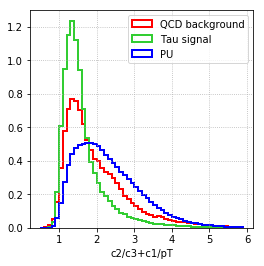

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c2']/dfQCD['cl3d_c3']+dfQCD['cl3d_c1']/dfQCD['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_c3']+dfTau['cl3d_c1']/dfTau['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_c3']+dfNu['cl3d_c1']/dfNu['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/c3+c1/pT')


for thr in np.arange(0.5,6,0.1):
        if dfTau.query('cl3d_c2/cl3d_c3+cl3d_c1/cl3d_pt<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

43.5


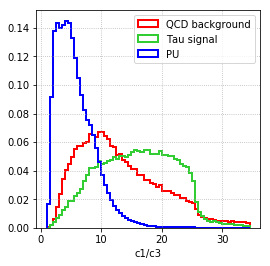

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c1']/dfQCD['cl3d_c3'], bins=np.arange(1,35,0.5), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_c3'], bins=np.arange(1,35,0.5), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_c3'], bins=np.arange(1,35,0.5), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/c3')

for thr in np.arange(1,50,0.5):
        if dfTau.query('cl3d_c1/cl3d_c3<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

2.6


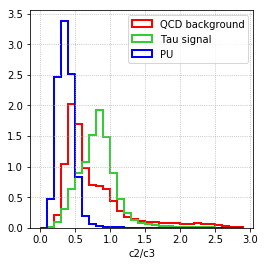

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c2']/dfQCD['cl3d_c3'], bins=np.arange(0,3,0.1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_c3'], bins=np.arange(0,3,0.1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_c3'], bins=np.arange(0,3,0.1), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/c3')

for thr in np.arange(0,3,0.1):
        if dfTau.query('cl3d_c2/cl3d_c3<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

34.0


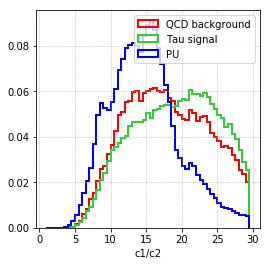

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c1']/dfQCD['cl3d_c2'], bins=np.arange(1,30,0.5), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_c2'], bins=np.arange(1,30,0.5), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_c2'], bins=np.arange(1,30,0.5), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/c2')

for thr in np.arange(0,40,0.5):
        if dfTau.query('cl3d_c1/cl3d_c2<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

5.0


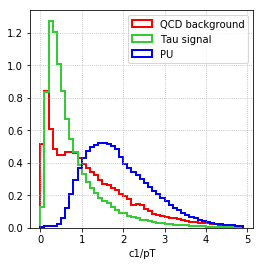

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c1']/dfQCD['cl3d_pt'], bins=np.arange(0,5,0.1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_pt'], bins=np.arange(0,5,0.1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_pt'], bins=np.arange(0,5,0.1), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/pT')

for thr in np.arange(0,10,0.1):
        if dfTau.query('cl3d_c1/cl3d_pt<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

0.84


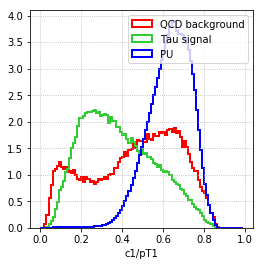

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c1']/dfQCD['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/pT1')

for thr in np.arange(0,1,0.01):
        if dfTau.query('cl3d_c1/cl3d_pt_c1<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

0.23


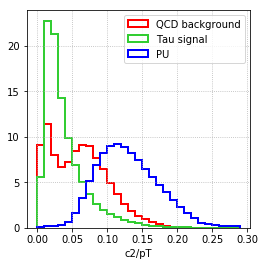

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c2']/dfQCD['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/pT')

for thr in np.arange(0,0.3,0.01):
        if dfTau.query('cl3d_c2/cl3d_pt<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

0.076


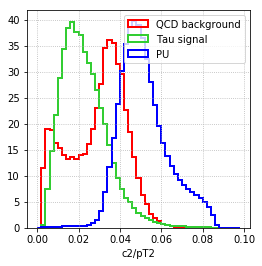

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c2']/dfQCD['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/pT2')

for thr in np.arange(0,0.1,0.002):
        if dfTau.query('cl3d_c2/cl3d_pt_c2<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

0.8


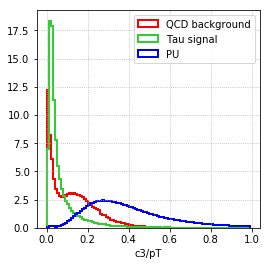

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c3']/dfQCD['cl3d_pt'], bins=np.arange(0,1,0.01), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c3']/dfTau['cl3d_pt'], bins=np.arange(0,1,0.01), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c3']/dfNu['cl3d_pt'], bins=np.arange(0,1,0.01), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3/pT')

for thr in np.arange(0,1,0.01):
        if dfTau.query('cl3d_c3/cl3d_pt<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

1.43


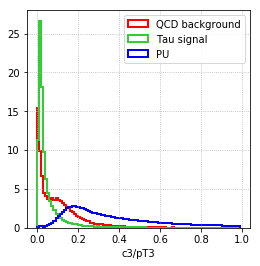

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_c3']/dfQCD['cl3d_pt_c3'], bins=np.arange(0,1,0.01), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_c3']/dfTau['cl3d_pt_c3'], bins=np.arange(0,1,0.01), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c3']/dfNu['cl3d_pt_c3'], bins=np.arange(0,1,0.01), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3/pT3')

for thr in np.arange(0,2,0.01):
        if dfTau.query('cl3d_c3/cl3d_pt_c3<={0}'.format(thr)).shape[0]/tot >= 0.999:
            print(thr)
            break

Text(0.5, 0, 'EM pT')

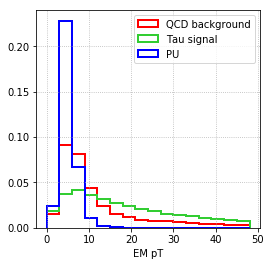

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_pt']/(1+dfQCD['cl3d_hoe']), bins=np.arange(0,50,3), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_pt']/(1+dfTau['cl3d_hoe']), bins=np.arange(0,50,3), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_pt']/(1+dfNu['cl3d_hoe']), bins=np.arange(0,50,3), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('EM pT')

Text(0.5, 0, 'EM pT_c3')

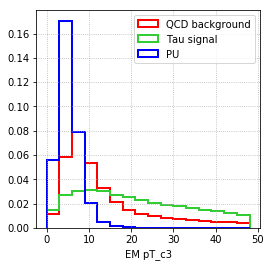

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_pt_c3']/(1+dfQCD['cl3d_hoe']), bins=np.arange(0,50,3), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_pt_c3']/(1+dfTau['cl3d_hoe']), bins=np.arange(0,50,3), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_pt_c3']/(1+dfNu['cl3d_hoe']), bins=np.arange(0,50,3), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('EM pT_c3')

Text(0.5, 0, 'HAD pT')

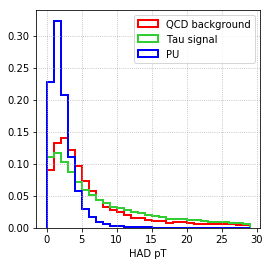

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_pt']/(1+1/dfQCD['cl3d_hoe']), bins=np.arange(0,30,1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_pt']/(1+1/dfTau['cl3d_hoe']), bins=np.arange(0,30,1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_pt']/(1+1/dfNu['cl3d_hoe']), bins=np.arange(0,30,1), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('HAD pT')

Text(0.5, 0, 'HAD pT_c3')

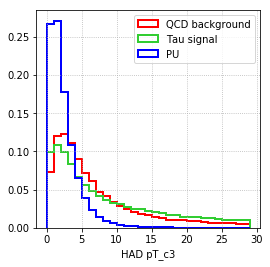

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_pt_c3']/(1+1/dfQCD['cl3d_hoe']), bins=np.arange(0,30,1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_pt_c3']/(1+1/dfTau['cl3d_hoe']), bins=np.arange(0,30,1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_pt_c3']/(1+1/dfNu['cl3d_hoe']), bins=np.arange(0,30,1), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('HAD pT_c3')

Text(0.5, 0, 'pT')

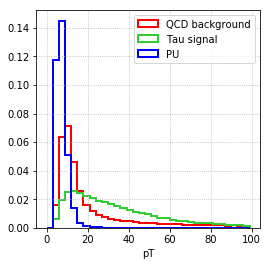

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_pt'], bins=np.arange(0,100,3), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_pt'], bins=np.arange(0,100,3), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_pt'], bins=np.arange(0,100,3), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('pT')

Text(0.5, 0, 'pT_c3')

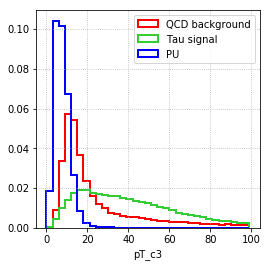

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfQCD['cl3d_pt_c3'], bins=np.arange(0,100,3), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau['cl3d_pt_c3'], bins=np.arange(0,100,3), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_pt_c3'], bins=np.arange(0,100,3), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('pT_c3')

# NEW DM SORTING VARIABLES

Text(0.5, 0, 'c1')

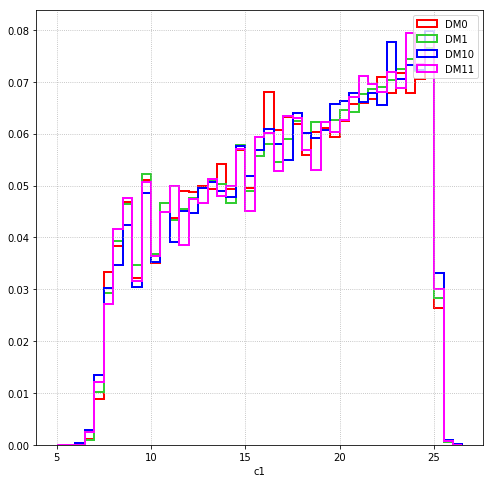

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c1'], bins=np.arange(5,27,0.5), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c1'], bins=np.arange(5,27,0.5), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c1'], bins=np.arange(5,27,0.5), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c1'], bins=np.arange(5,27,0.5), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1')

Text(0.5, 0, 'c2')

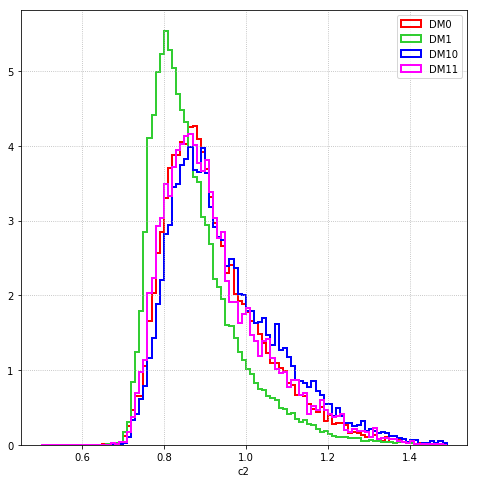

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c2'], bins=np.arange(0.5,1.5,0.01), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c2'], bins=np.arange(0.5,1.5,0.01), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c2'], bins=np.arange(0.5,1.5,0.01), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c2'], bins=np.arange(0.5,1.5,0.01), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2')

Text(0.5, 0, 'c3')

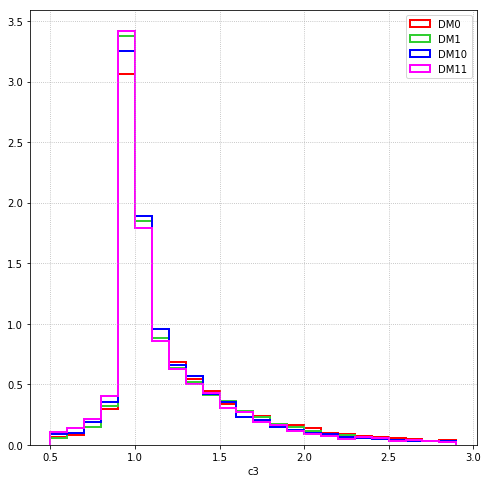

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c3'], bins=np.arange(0.5,3,0.1), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c3'], bins=np.arange(0.5,3,0.1), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c3'], bins=np.arange(0.5,3,0.1), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c3'], bins=np.arange(0.5,3,0.1), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3')

Text(0.5, 0, 'c2/c3+c1/pT')

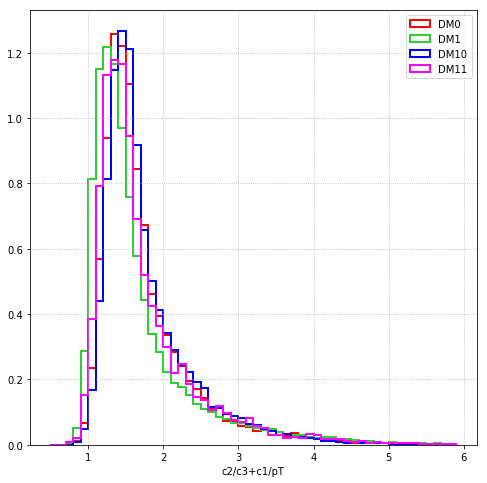

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c2']/dfDM0['cl3d_c3']+dfDM0['cl3d_c1']/dfDM0['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c2']/dfDM1['cl3d_c3']+dfDM1['cl3d_c1']/dfDM1['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c2']/dfDM10['cl3d_c3']+dfDM10['cl3d_c1']/dfDM10['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c2']/dfDM11['cl3d_c3']+dfDM11['cl3d_c1']/dfDM11['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/c3+c1/pT')

Text(0.5, 0, 'c1/c3')

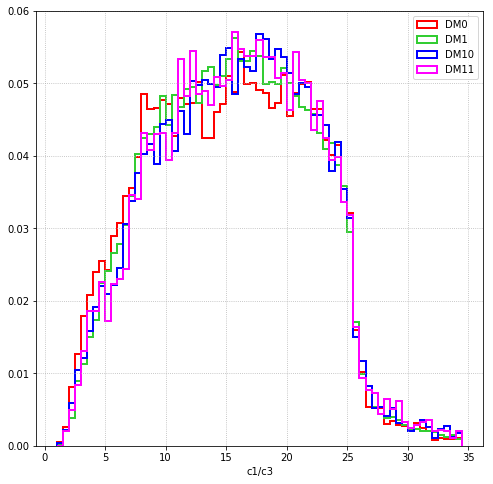

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c1']/dfDM0['cl3d_c3'], bins=np.arange(1,35,0.5), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c1']/dfDM1['cl3d_c3'], bins=np.arange(1,35,0.5), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c1']/dfDM10['cl3d_c3'], bins=np.arange(1,35,0.5), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c1']/dfDM11['cl3d_c3'], bins=np.arange(1,35,0.5), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/c3')

Text(0.5, 0, 'c2/c3')

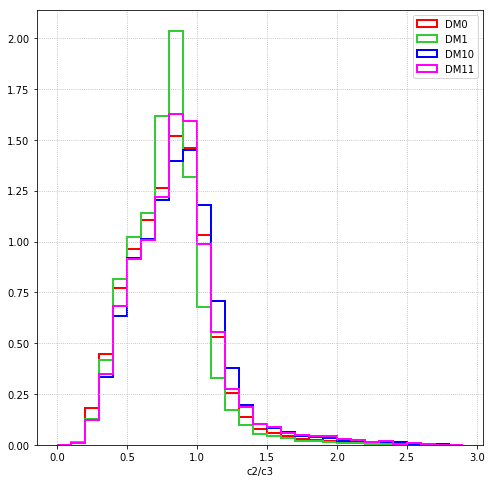

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c2']/dfDM0['cl3d_c3'], bins=np.arange(0,3,0.1), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c2']/dfDM1['cl3d_c3'], bins=np.arange(0,3,0.1), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c2']/dfDM10['cl3d_c3'], bins=np.arange(0,3,0.1), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c2']/dfDM11['cl3d_c3'], bins=np.arange(0,3,0.1), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/c3')

Text(0.5, 0, 'c1/c2')

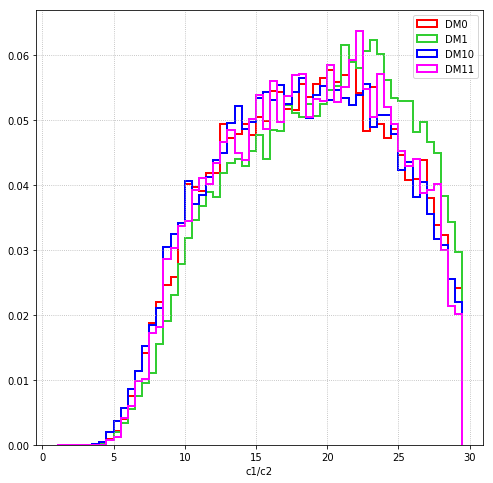

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c1']/dfDM0['cl3d_c2'], bins=np.arange(1,30,0.5), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c1']/dfDM1['cl3d_c2'], bins=np.arange(1,30,0.5), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c1']/dfDM10['cl3d_c2'], bins=np.arange(1,30,0.5), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c1']/dfDM11['cl3d_c2'], bins=np.arange(1,30,0.5), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/c2')

Text(0.5, 0, 'c1/pT')

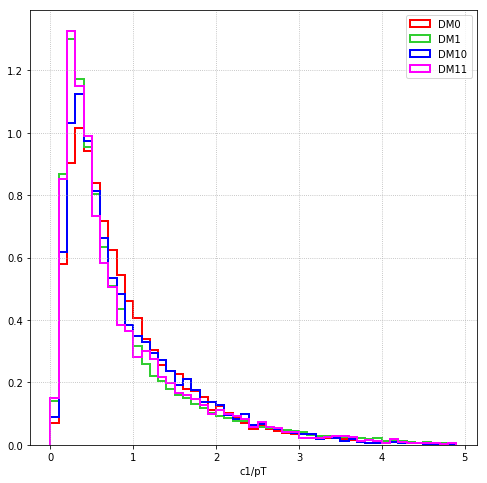

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c1']/dfDM0['cl3d_pt'], bins=np.arange(0,5,0.1), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c1']/dfDM1['cl3d_pt'], bins=np.arange(0,5,0.1), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c1']/dfDM10['cl3d_pt'], bins=np.arange(0,5,0.1), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c1']/dfDM11['cl3d_pt'], bins=np.arange(0,5,0.1), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/pT')

Text(0.5, 0, 'c1/pT1')

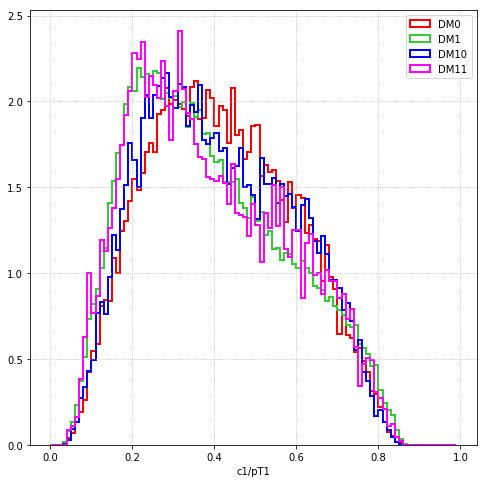

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c1']/dfDM0['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c1']/dfDM1['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c1']/dfDM10['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c1']/dfDM11['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/pT1')

Text(0.5, 0, 'c2/pT')

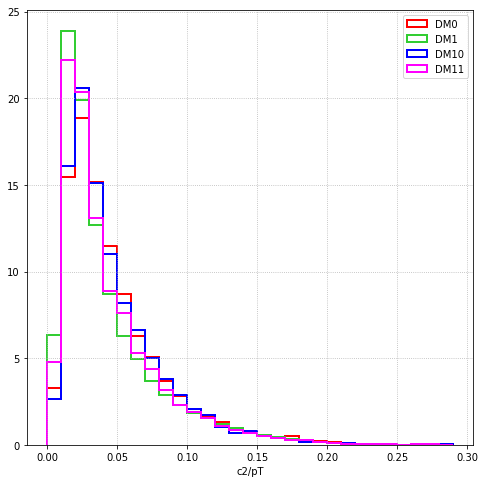

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c2']/dfDM0['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c2']/dfDM1['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c2']/dfDM10['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c2']/dfDM11['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/pT')

Text(0.5, 0, 'c2/pT2')

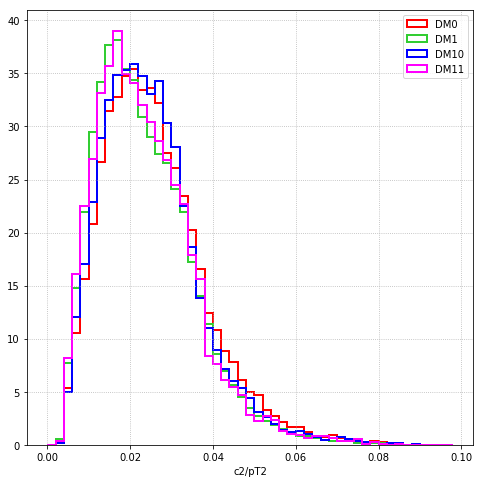

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c2']/dfDM0['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c2']/dfDM1['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c2']/dfDM10['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c2']/dfDM11['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/pT2')

Text(0.5, 0, 'c3/pT')

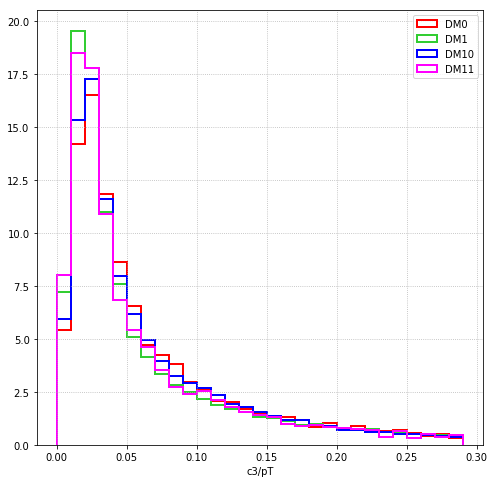

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c3']/dfDM0['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c3']/dfDM1['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c3']/dfDM10['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c3']/dfDM11['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3/pT')

Text(0.5, 0, 'c3/pT3')

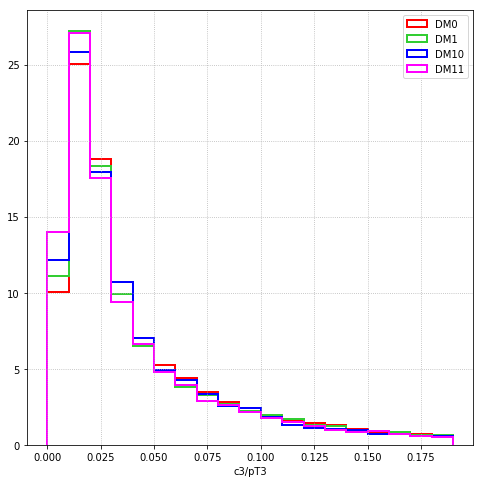

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_c3']/dfDM0['cl3d_pt_c3'], bins=np.arange(0,0.2,0.01), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_c3']/dfDM1['cl3d_pt_c3'], bins=np.arange(0,0.2,0.01), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_c3']/dfDM10['cl3d_pt_c3'], bins=np.arange(0,0.2,0.01), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_c3']/dfDM11['cl3d_pt_c3'], bins=np.arange(0,0.2,0.01), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3/pT3')

Text(0.5, 0, 'EM pT')

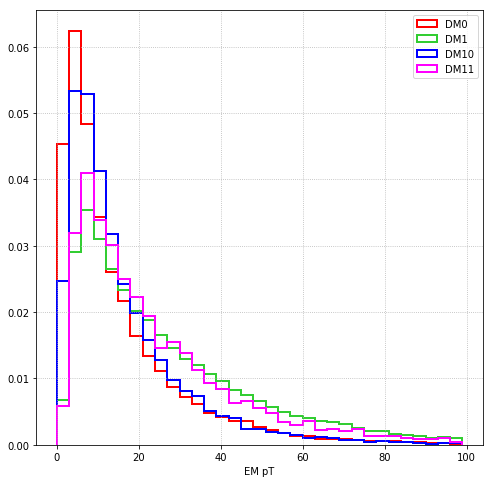

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_pt']/(1+dfDM0['cl3d_hoe']), bins=np.arange(0,100,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_pt']/(1+dfDM1['cl3d_hoe']), bins=np.arange(0,100,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_pt']/(1+dfDM10['cl3d_hoe']), bins=np.arange(0,100,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_pt']/(1+dfDM11['cl3d_hoe']), bins=np.arange(0,100,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('EM pT')

Text(0.5, 0, 'EM pT_c3')

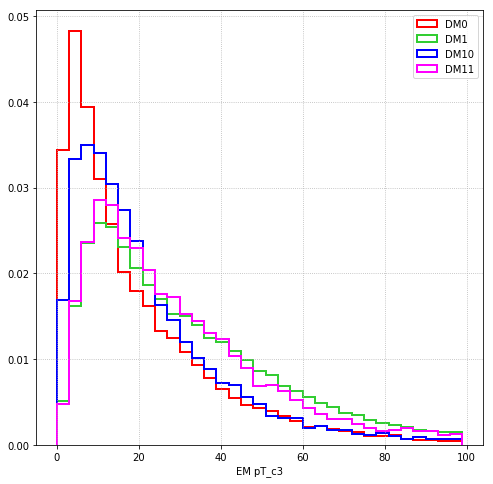

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_pt_c3']/(1+dfDM0['cl3d_hoe']), bins=np.arange(0,100,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_pt_c3']/(1+dfDM1['cl3d_hoe']), bins=np.arange(0,100,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_pt_c3']/(1+dfDM10['cl3d_hoe']), bins=np.arange(0,100,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_pt_c3']/(1+dfDM11['cl3d_hoe']), bins=np.arange(0,100,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('EM pT_c3')

Text(0.5, 0, 'HAD pT')

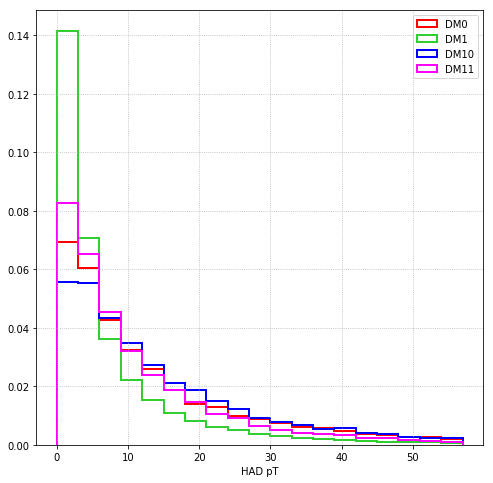

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_pt']/(1+1/dfDM0['cl3d_hoe']), bins=np.arange(0,60,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_pt']/(1+1/dfDM1['cl3d_hoe']), bins=np.arange(0,60,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_pt']/(1+1/dfDM10['cl3d_hoe']), bins=np.arange(0,60,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_pt']/(1+1/dfDM11['cl3d_hoe']), bins=np.arange(0,60,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('HAD pT')

Text(0.5, 0, 'HAD pT_c3')

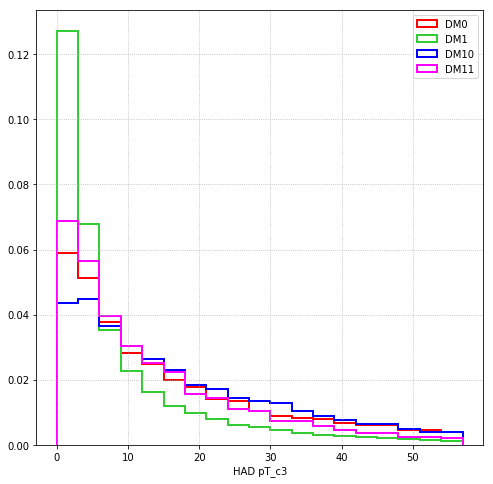

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfDM0['cl3d_pt_c3']/(1+1/dfDM0['cl3d_hoe']), bins=np.arange(0,60,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfDM1['cl3d_pt_c3']/(1+1/dfDM1['cl3d_hoe']), bins=np.arange(0,60,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfDM10['cl3d_pt_c3']/(1+1/dfDM10['cl3d_hoe']), bins=np.arange(0,60,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfDM11['cl3d_pt_c3']/(1+1/dfDM11['cl3d_hoe']), bins=np.arange(0,60,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('HAD pT_c3')

In [32]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT_mass/hdf5dataframes/matched'

name = 'threshold'

store_tr = pd.HDFStore(indir+'/GluGluHHTo2b2Tau_PU200_th_matched.hdf5', mode='r')
dfHH = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(indir+'/RelValTenTau_PU200_th_matched.hdf5', mode='r')
dfTT = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(indir+'/RelValSingleTau_PU200_th_matched.hdf5', mode='r')
dfST = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(indir+'/VBFHToTauTau_PU200_th_matched.hdf5', mode='r')
dfVBF = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(indir+'/ZprimeToTauTau_PU200_th_matched.hdf5', mode='r')
dfZP = store_tr[name]
store_tr.close()

dfM = pd.concat([dfHH, dfTT, dfST, dfVBF, dfZP], sort=False)
del dfHH, dfTT, dfST, dfVBF, dfZP

In [34]:
dfMDM0 = dfM.query('sgnId == 1 and gentau_decayMode==0').copy(deep=True)
dfMDM1 = dfM.query('sgnId == 1 and gentau_decayMode==1').copy(deep=True)
dfMDM10 = dfM.query('sgnId == 1 and gentau_decayMode==10').copy(deep=True)
dfMDM11 = dfM.query('sgnId == 1 and gentau_decayMode==11').copy(deep=True)

In [37]:
import ROOT

def Mcalc(row):
    tlv = ROOT.TLorentzVector()
    tlv.SetPtEtaPhiE(row['cl3d_pt'], row['cl3d_eta'], row['cl3d_phi'], row['cl3d_energy'])
    return tlv.M()

dfMDM0['cl3d_mass'] = dfMDM0.apply(lambda row: Mcalc(row), axis=1)
dfMDM1['cl3d_mass'] = dfMDM1.apply(lambda row: Mcalc(row), axis=1)
dfMDM10['cl3d_mass'] = dfMDM10.apply(lambda row: Mcalc(row), axis=1)
dfMDM11['cl3d_mass'] = dfMDM11.apply(lambda row: Mcalc(row), axis=1)

Welcome to JupyROOT 6.14/04


Text(0.5, 0, 'mass')

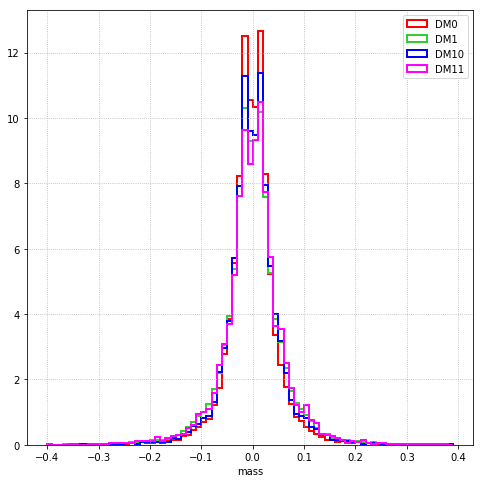

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfMDM0['cl3d_mass'], bins=np.arange(-0.4,0.4,0.01), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfMDM1['cl3d_mass'], bins=np.arange(-0.4,0.4,0.01), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfMDM10['cl3d_mass'], bins=np.arange(-0.4,0.4,0.01), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfMDM11['cl3d_mass'], bins=np.arange(-0.4,0.4,0.01), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('mass')

# Out of the full L1 algo

In [29]:
PUWP = 90

In [30]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolated_skimPUnoPtRscld_skimISORscld90hardPUrej'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_PUWP{0}_isoQCDrejected.hdf5'.format(PUWP),
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_PUWP{0}_isoQCDrejected.hdf5'.format(PUWP),
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfVal = store_tr[name]
store_tr.close()

df = pd.concat([dfTr, dfVal], sort=False)
del dfTr, dfVal

In [31]:
print(df.shape[0])
df.query('cl3d_pubdt_passWP90==True and cl3d_isobdt_passWP99==True', inplace=True)
print(df.shape[0])

186978
135603


In [32]:
dfQCD = df.query('gentau_decayMode==-2 and cl3d_isbestmatch==True').copy(deep=True)
dfTau = df.query('sgnId==1').copy(deep=True)
dfNu  = df.query('geom_match==False').copy(deep=True)

Text(0.5, 0, 'c2/c3+c1/pT')

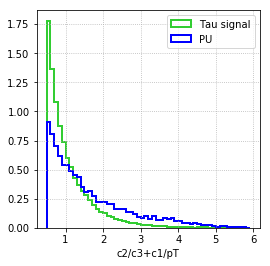

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_c3']+dfTau['cl3d_c1']/dfTau['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_c3']+dfNu['cl3d_c1']/dfNu['cl3d_pt'], bins=np.arange(0.5,6,0.1), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/c3+c1/pT')

Text(0.5, 0, 'c1/c3')

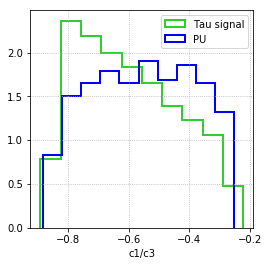

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_c3'], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_c3'], label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/c3')

Text(0.5, 0, 'c2/c3')

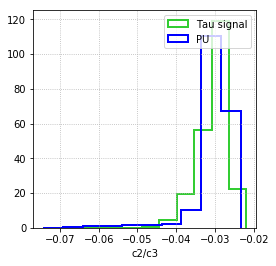

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_c3'], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_c3'], label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/c3')

Text(0.5, 0, 'c1/c2')

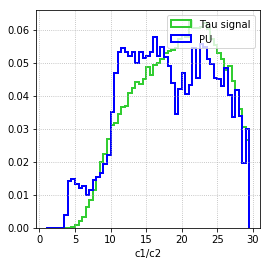

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_c2'], bins=np.arange(1,30,0.5), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_c2'], bins=np.arange(1,30,0.5), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/c2')

Text(0.5, 0, 'c1/pT')

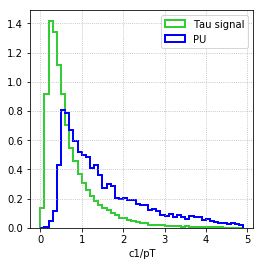

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_pt'], bins=np.arange(0,5,0.1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_pt'], bins=np.arange(0,5,0.1), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/pT')

Text(0.5, 0, 'c1/pT1')

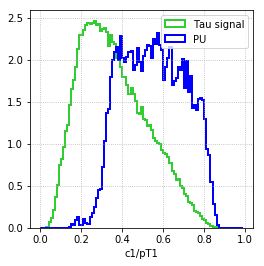

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c1']/dfTau['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1']/dfNu['cl3d_pt_c1'], bins=np.arange(0,1,0.01), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1/pT1')

Text(0.5, 0, 'c2/pT')

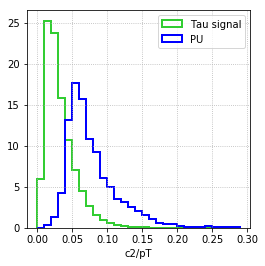

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_pt'], bins=np.arange(0,0.3,0.01), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/pT')

Text(0.5, 0, 'c2/pT2')

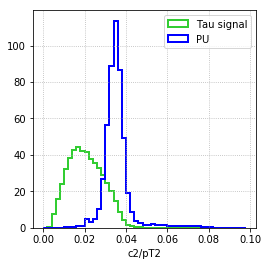

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c2']/dfTau['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2']/dfNu['cl3d_pt_c2'], bins=np.arange(0,0.1,0.002), label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2/pT2')

Text(0.5, 0, 'c3/pT')

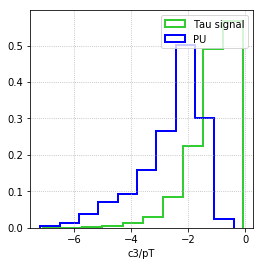

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c3']/dfTau['cl3d_pt'], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c3']/dfNu['cl3d_pt'], label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3/pT')

Text(0.5, 0, 'c3/pT3')

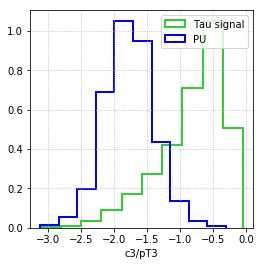

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c3']/dfTau['cl3d_pt_c3'], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c3']/dfNu['cl3d_pt_c3'], label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3/pT3')

Text(0.5, 0, 'c1')

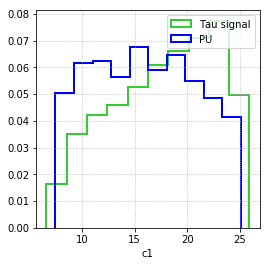

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c1'], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c1'], label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c1')

Text(0.5, 0, 'c2')

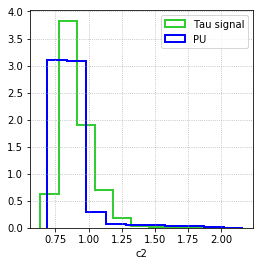

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c2'], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c2'], label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c2')

Text(0.5, 0, 'c3')

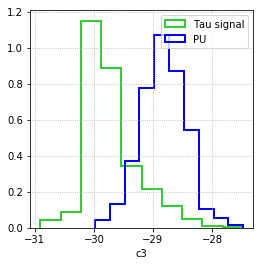

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.hist(dfTau['cl3d_c3'], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfNu['cl3d_c3'], label='PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('c3')

In [42]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolated_skimPUnoPtRscld_90hardPUrej'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_isoCalculated.hdf5',
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_isoCalculated.hdf5',
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfVal = store_tr[name]
store_tr.close()

dfI = pd.concat([dfTr, dfVal], sort=False)
del dfTr, dfVal

In [43]:
dfIDM0 = dfI.query('sgnId == 1 and gentau_decayMode==0').copy(deep=True)
dfIDM1 = dfI.query('sgnId == 1 and gentau_decayMode==1').copy(deep=True)
dfIDM10 = dfI.query('sgnId == 1 and gentau_decayMode==10').copy(deep=True)
dfIDM11 = dfI.query('sgnId == 1 and gentau_decayMode==11').copy(deep=True)

Text(0.5, 0, 'cl3d_NclIso_dR4')

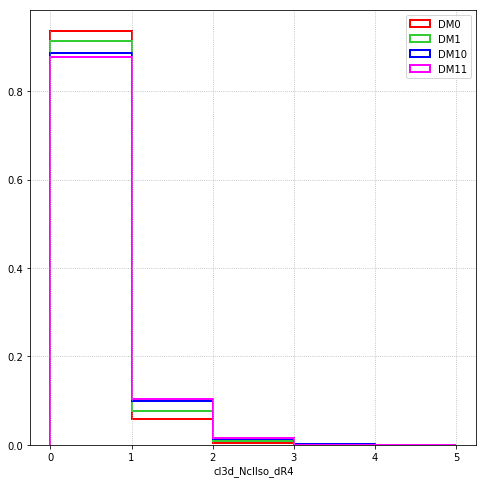

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['cl3d_NclIso_dR4'], bins=np.arange(0,6,1), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['cl3d_NclIso_dR4'], bins=np.arange(0,6,1), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['cl3d_NclIso_dR4'], bins=np.arange(0,6,1), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['cl3d_NclIso_dR4'], bins=np.arange(0,6,1), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('cl3d_NclIso_dR4')

Text(0.5, 0, 'cl3d_etIso_dR4')

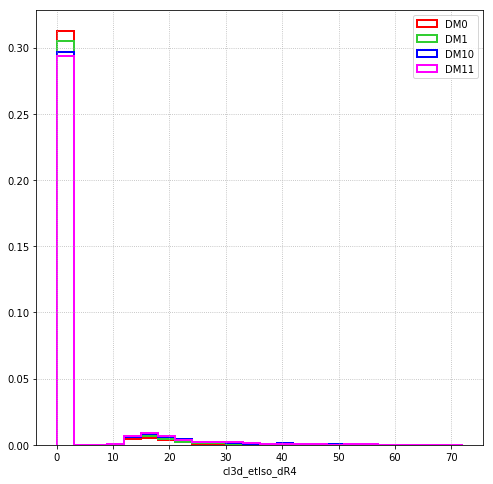

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['cl3d_etIso_dR4'], bins=np.arange(0,75,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['cl3d_etIso_dR4'], bins=np.arange(0,75,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['cl3d_etIso_dR4'], bins=np.arange(0,75,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['cl3d_etIso_dR4'], bins=np.arange(0,75,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('cl3d_etIso_dR4')

Text(0.5, 0, 'tower_etSgn_dRsgn1')

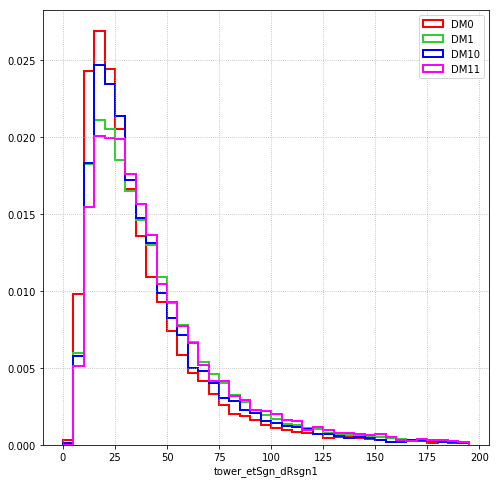

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etSgn_dRsgn1'], bins=np.arange(0,200,5), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etSgn_dRsgn1'], bins=np.arange(0,200,5), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etSgn_dRsgn1'], bins=np.arange(0,200,5), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etSgn_dRsgn1'], bins=np.arange(0,200,5), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etSgn_dRsgn1')

Text(0.5, 0, 'tower_etSgn_dRsgn2')

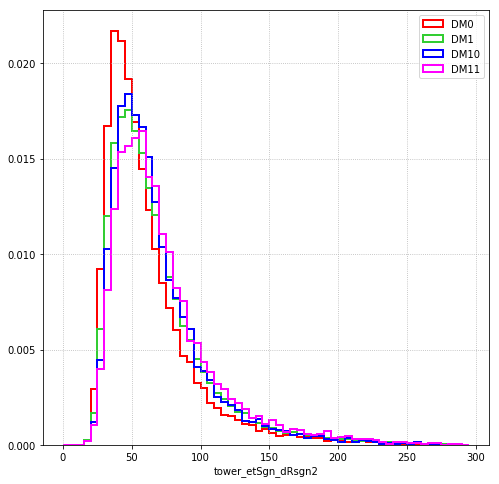

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etSgn_dRsgn2'], bins=np.arange(0,300,5), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etSgn_dRsgn2'], bins=np.arange(0,300,5), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etSgn_dRsgn2'], bins=np.arange(0,300,5), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etSgn_dRsgn2'], bins=np.arange(0,300,5), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etSgn_dRsgn2')

Text(0.5, 0, 'tower_etIso_dRsgn1_dRiso3')

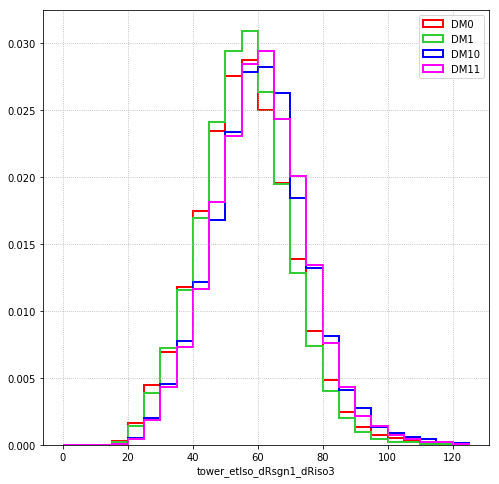

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etIso_dRsgn1_dRiso3'], bins=np.arange(0,130,5), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etIso_dRsgn1_dRiso3'], bins=np.arange(0,130,5), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etIso_dRsgn1_dRiso3'], bins=np.arange(0,130,5), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etIso_dRsgn1_dRiso3'], bins=np.arange(0,130,5), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etIso_dRsgn1_dRiso3')

Text(0.5, 0, 'tower_etEmIso_dRsgn1_dRiso3')

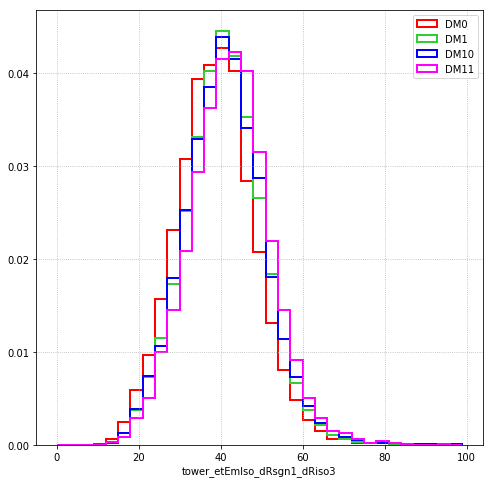

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etEmIso_dRsgn1_dRiso3'], bins=np.arange(0,100,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etEmIso_dRsgn1_dRiso3'], bins=np.arange(0,100,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etEmIso_dRsgn1_dRiso3'], bins=np.arange(0,100,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etEmIso_dRsgn1_dRiso3'], bins=np.arange(0,100,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etEmIso_dRsgn1_dRiso3')

Text(0.5, 0, 'tower_etHadIso_dRsgn1_dRiso7')

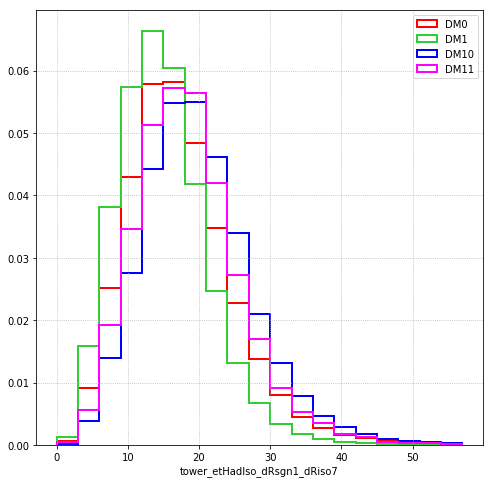

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etHadIso_dRsgn1_dRiso7'], bins=np.arange(0,60,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etHadIso_dRsgn1_dRiso7'], bins=np.arange(0,60,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etHadIso_dRsgn1_dRiso7'], bins=np.arange(0,60,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etHadIso_dRsgn1_dRiso7'], bins=np.arange(0,60,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etHadIso_dRsgn1_dRiso7')

Text(0.5, 0, 'tower_etIso_dRsgn2_dRiso4')

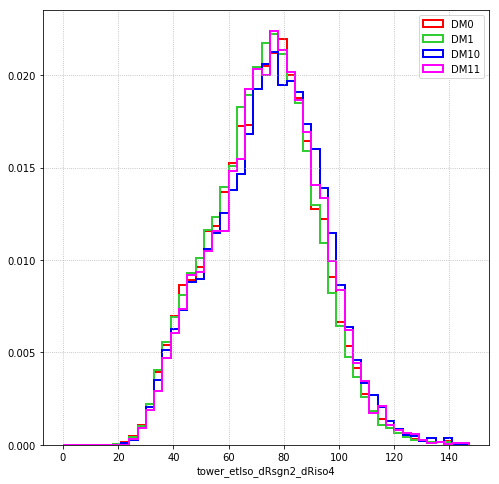

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etIso_dRsgn2_dRiso4'], bins=np.arange(0,150,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etIso_dRsgn2_dRiso4'], bins=np.arange(0,150,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etIso_dRsgn2_dRiso4'], bins=np.arange(0,150,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etIso_dRsgn2_dRiso4'], bins=np.arange(0,150,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etIso_dRsgn2_dRiso4')

Text(0.5, 0, 'tower_etEmIso_dRsgn2_dRiso4')

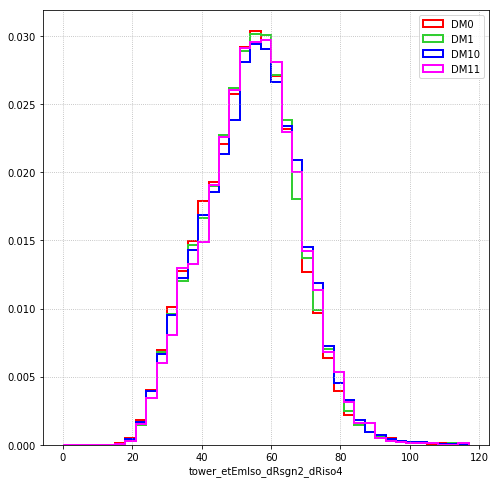

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etEmIso_dRsgn2_dRiso4'], bins=np.arange(0,120,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etEmIso_dRsgn2_dRiso4'], bins=np.arange(0,120,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etEmIso_dRsgn2_dRiso4'], bins=np.arange(0,120,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etEmIso_dRsgn2_dRiso4'], bins=np.arange(0,120,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etEmIso_dRsgn2_dRiso4')

Text(0.5, 0, 'tower_etHadIso_dRsgn2_dRiso7')

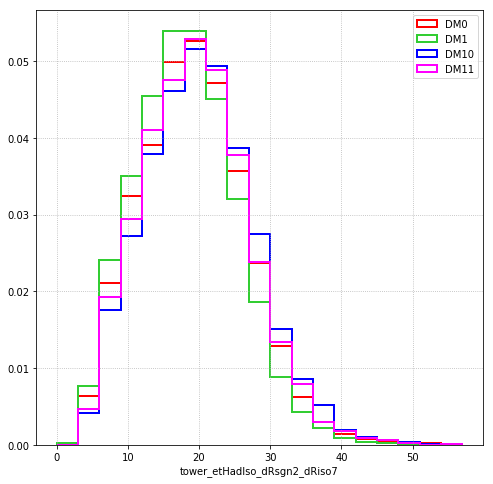

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(dfIDM0['tower_etHadIso_dRsgn2_dRiso7'], bins=np.arange(0,60,3), label='DM0',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfIDM1['tower_etHadIso_dRsgn2_dRiso7'], bins=np.arange(0,60,3), label='DM1',   color='limegreen',    histtype='step', lw=2, density=True)
ax.hist(dfIDM10['tower_etHadIso_dRsgn2_dRiso7'], bins=np.arange(0,60,3), label='DM10',   color='blue',    histtype='step', lw=2, density=True)
ax.hist(dfIDM11['tower_etHadIso_dRsgn2_dRiso7'], bins=np.arange(0,60,3), label='DM11',   color='fuchsia',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('tower_etHadIso_dRsgn2_dRiso7')